In [1]:
#載入需要套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#讀入我爬蟲完 存好的檔案
df = pd.read_csv('df_merge')
df.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
#bringing salary column to front of dataframe
cols = df.columns.tolist()
cols = cols[50:] + cols[:50]
df = df[cols]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 51 columns):
SALARY    2656 non-null float64
Player    2656 non-null object
Pos       2656 non-null object
Age       2656 non-null float64
Tm        2656 non-null object
G         2656 non-null float64
GS        2656 non-null float64
MP        2656 non-null float64
FG        2656 non-null float64
FGA       2656 non-null float64
FG%       2656 non-null float64
3P        2656 non-null float64
3PA       2656 non-null float64
3P%       2656 non-null float64
2P        2656 non-null float64
2PA       2656 non-null float64
2P%       2656 non-null float64
FT        2656 non-null float64
FTA       2656 non-null float64
FT%       2656 non-null float64
ORB       2656 non-null float64
DRB       2656 non-null float64
TRB       2656 non-null float64
AST       2656 non-null float64
STL       2656 non-null float64
BLK       2656 non-null float64
TOV       2656 non-null float64
PF        2656 non-null float64


In [5]:
#drop incorrect outliner
df = df.drop(df[df['PTS']>80].index)

In [6]:
#dropping categorical values in df so I can start a model
df_values = df.drop(['Player', 'TEAM', 'Pos', 'Year','Tm'], axis=1)

In [7]:
df.head()

,SALARY,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TEAM
0,665000.0,Quincy Acy,PF,22.0,TOR,29.0,0.0,342.0,4.4,7.9,...,14.7,0.7,0.4,1.1,0.157,-0.6,1.3,0.7,0.2,Toronto Raptors
1,916099.0,Jeff Adrien,PF,26.0,CHA,52.0,5.0,713.0,3.6,8.5,...,15.6,0.5,0.4,1.0,0.064,-3.0,-0.2,-3.3,-0.2,Charlotte Bobcats
2,7750000.0,Arron Afflalo,SF,27.0,ORL,64.0,64.0,2307.0,6.2,14.1,...,22.5,1.5,0.5,2.0,0.042,-0.3,-2.0,-2.3,-0.2,Orlando Magic
3,473604.0,Josh Akognon,PG,26.0,DAL,3.0,0.0,9.0,8.0,16.0,...,20.3,0.0,0.0,0.0,0.196,4.7,-4.9,-0.2,0.0,Dallas Mavericks
4,2445480.0,Cole Aldrich,C,24.0,TOT,45.0,0.0,388.0,4.1,7.4,...,12.7,0.1,0.4,0.6,0.070,-4.8,0.7,-4.0,-0.2,Sacramento Kings


### 首先探索一下資料間的關係 Exploratory Data Analysis

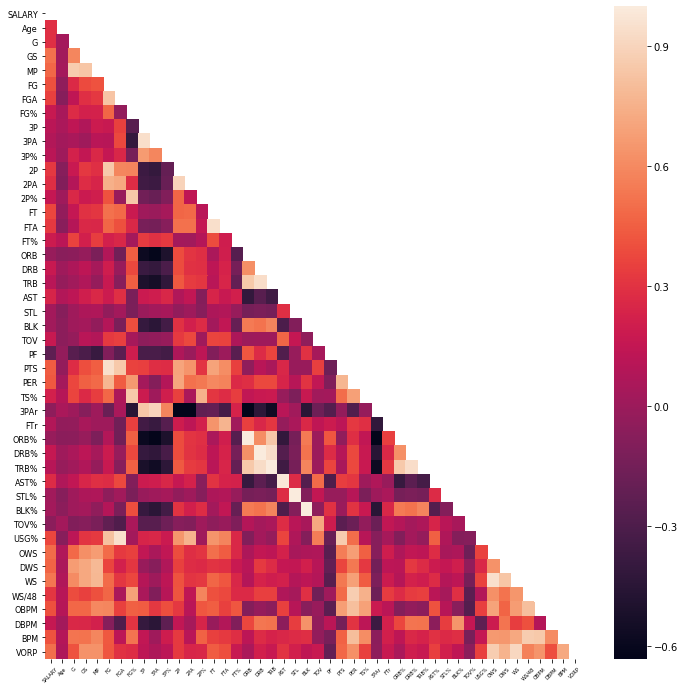

In [8]:
#畫Heatmap圖 以看各種類之間的相關性

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(df_values)

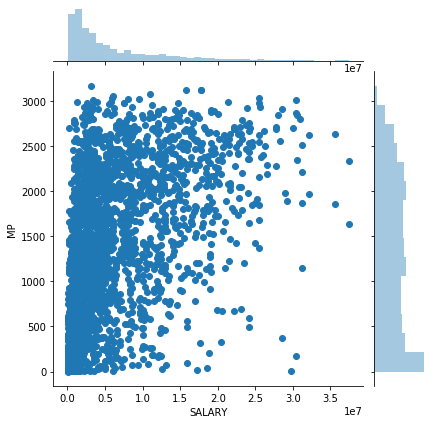

In [9]:
sns.jointplot(df_values.SALARY, df_values['MP'])
plt.show()

對球員上場時間以及薪水 畫圖 我認為通常一個選手在場上打球越久 代表他可以為球隊帶來比較高的價值 故應該薪水也會較高
可以發現大致仍呈現正相關 然而卻也有許多球員在場上時間很長但薪水也未必較高的情形發生

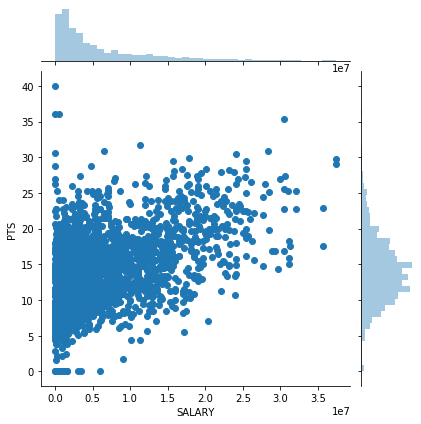

In [11]:
sns.jointplot(df_values.SALARY, df_values['PTS'])
plt.show()

對球員薪水以及他們的得分表現 畫圖 可以發現大致仍呈現正相關 因此得分仍是一個相當好可以拿來預測薪水的一項因子